In [160]:
import pandas as pd
import numpy as np

In [112]:
df_sku_master = pd.read_excel('data.xlsx', sheet_name = 1)
df_store1 = pd.read_excel('data.xlsx', sheet_name = 2)
df_store2 = pd.read_excel('data.xlsx', sheet_name = 3)
# df_sku_master = pd.read_excel('data.xlsx', sheet_name = 1)
df_store1.shape

(3696, 6)

In [113]:
# df_store1[['Unit Sales']] = df_store1[['Unit Sales']].apply(pd.to_numeric, errors='coerce')

In [114]:
df_store1.dropna(subset=['Rupee Sales'], inplace=True)
df_store1.shape

df_store2.dropna(subset=['Rupee Sales'], inplace=True)


In [115]:
df_store1.isna().sum()

DB_ID          0
SKU            0
Store          0
Date           0
Unit Sales     0
Rupee Sales    0
dtype: int64

In [116]:
df_store1['Date'] = pd.to_datetime(df_store1['Date'])
df_store2['Date'] = pd.to_datetime(df_store2['Date'])

df_store1['month'] = df_store1['Date'].dt.month
df_store2['month'] = df_store2['Date'].dt.month

df_store1['week'] = df_store1['Date'].dt.week
df_store2['week'] = df_store2['Date'].dt.week

C:\Users\shobh\AppData\Local\Temp/ipykernel_11620/3680663038.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_store1['week'] = df_store1['Date'].dt.week
C:\Users\shobh\AppData\Local\Temp/ipykernel_11620/3680663038.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_store2['week'] = df_store2['Date'].dt.week


In [117]:
df_sku_master.head(2)

,Department,Class,Style,Color,SKU,Cost,Price,Vendor
0,800,5,20,2,8000520021,7.5,9.99,ABC National Products
1,800,4,51,11,8000451112,9.0,12.99,ABC National Products


In [118]:
df_store1.head(2)

,DB_ID,SKU,Store,Date,Unit Sales,Rupee Sales,month,week
0,79918,50012011250,1,2016-02-18,60000,599400.0,2,7
1,79533,50012011250,1,2014-11-18,50000,499500.0,11,47


In [119]:
df_store1 = pd.merge(how='left', left=df_store1, right=df_sku_master, )


In [136]:
df_store2 = pd.merge(how='left', left=df_store2, right=df_sku_master, )

In [140]:
# df_store2.isna().sum()
print(df_store2.SKU.unique())
print(df_sku_master.SKU.unique())

[7312455520 7312455530 8000451112 8000520021 50012011240 50012011250
 50012011340 50012011341 50013000110 '50*12011250']
[ 8000520021  8000451112  7312455520  7312455530 50012011240 50012011250
 50012011341 50013000110]


In [120]:
df_store1.head(2)

,DB_ID,SKU,Store,Date,Unit Sales,Rupee Sales,month,week,Department,Class,Style,Color,Cost,Price,Vendor
0,79918,50012011250,1,2016-02-18,60000,599400.0,2,7,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
1,79533,50012011250,1,2014-11-18,50000,499500.0,11,47,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products


In [121]:
9.99*50000

499500.0

In [122]:
df_store1.head(10)

,DB_ID,SKU,Store,Date,Unit Sales,Rupee Sales,month,week,Department,Class,Style,Color,Cost,Price,Vendor
0,79918,50012011250,1,2016-02-18,60000,599400.0,2,7,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
1,79533,50012011250,1,2014-11-18,50000,499500.0,11,47,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
2,80033,50012011250,1,2016-05-07,50000,499500.0,5,18,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
3,79542,50012011250,1,2014-11-28,40000,399600.0,11,48,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
4,79892,50012011250,1,2016-01-18,40000,399600.0,1,3,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
5,79465,50012011250,1,2014-08-28,30000,299700.0,8,35,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
6,79720,50012011250,1,2015-06-27,30000,299700.0,6,26,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
7,79806,50012011250,1,2015-09-10,30000,299700.0,9,37,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
8,79654,50012011250,1,2015-10-04,20000,199800.0,10,40,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
9,79618,50012011250,1,2015-02-26,10000,99900.0,2,9,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products


In [123]:
q1 = df_store1[df_store1['Vendor'] =='ABC National Products'].groupby(by='month').agg({'Rupee Sales':'mean'}).reset_index()
q1.sort_values(by='Rupee Sales', inplace=True, ascending=False)
q1

,month,Rupee Sales
4,5,141.658483
7,8,141.571641
0,1,140.685743
1,2,133.647239
11,12,130.514571
10,11,124.818529
3,4,122.784207
6,7,122.661729
2,3,117.104848
8,9,110.317727


In [124]:
df_store1['week'] = df_store1['Date'].dt.week
q2 = df_store1[df_store1['Vendor'] =='ABC National Products'].groupby(by='week').agg({'Rupee Sales':'sum'}).reset_index()
q2.sort_values(by='Rupee Sales', inplace=True, ascending=False)
q2.head(3)

,week,Rupee Sales
43,44,6831.07
47,48,6721.89
32,33,6068.39


In [135]:
df_store1['Rupee Cost'] = df_store1['Unit Sales']*df_store1['Cost']
q3 = df_store1[df_store1['Vendor'] =='ABC National Products'].groupby(by='month').agg({'Rupee Cost':'sum','Rupee Sales':'sum' }).reset_index()
q3['margin'] = (q3['Rupee Sales'] - q3['Rupee Cost'])/q3['Rupee Cost'] *100
q3.sort_values(by='margin', inplace=True, ascending=False)
q3

,month,Rupee Cost,Rupee Sales,margin
11,12,12471.0,18272.04,46.516238
1,2,12455.5,17908.73,43.781703
2,3,10795.5,15457.84,43.187810
10,11,11886.5,16975.32,42.811761
3,4,12539.0,17803.71,41.986682
4,5,14514.0,20540.48,41.521841
8,9,8588.5,12134.95,41.293008
6,7,11563.0,16314.01,41.088039
0,1,14763.0,20821.49,41.038339
7,8,12865.0,18121.17,40.856354


In [128]:
df_store1

,DB_ID,SKU,Store,Date,Unit Sales,Rupee Sales,month,week,Department,Class,Style,Color,Cost,Price,Vendor
0,79918,50012011250,1,2016-02-18,60000,599400.00,2,7,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
1,79533,50012011250,1,2014-11-18,50000,499500.00,11,47,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
2,80033,50012011250,1,2016-05-07,50000,499500.00,5,18,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
3,79542,50012011250,1,2014-11-28,40000,399600.00,11,48,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
4,79892,50012011250,1,2016-01-18,40000,399600.00,1,3,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,79645,50012011250,1,2015-03-31,-4,-39.96,3,14,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
3612,79747,50012011250,1,2015-07-31,-4,-39.96,7,31,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
3613,79802,50012011250,1,2015-05-10,-4,-39.96,5,19,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products
3614,79865,50012011250,1,2015-12-17,-5,-49.95,12,51,5001.0,201.0,12.0,5.0,7.5,9.99,Imported Products


In [129]:
q4 = df_store1[df_store1['Vendor'] =='Imported Products'].groupby(by='month').agg({'Unit Sales':'sum'}).reset_index()
q4.sort_values(by='Unit Sales', ascending=False)

,month,Unit Sales
10,11,90276
1,2,80308
4,5,50785
0,1,40306
5,6,30326
8,9,30299
7,8,30239
9,10,20338
3,4,355
11,12,337


In [144]:
q5 = df_store1[df_store1['Vendor'] =='Regionally Manufactured'].groupby(by='month').agg({'Unit Sales':'mean'}).reset_index()
q5.sort_values(by='Unit Sales', ascending=False, inplace=True)
q5

,month,Unit Sales
2,3,2.974359
1,2,2.967742
5,6,2.935484
0,1,2.875000
7,8,2.868421
3,4,2.763158
8,9,2.742857
4,5,2.733333
9,10,2.613636
6,7,2.550000


In [141]:
df_store2.Vendor.value_counts()

ABC National Products      1603
Imported Products          1269
Regionally Manufactured     333
Name: Vendor, dtype: int64

# HR 

In [212]:
df_hr = pd.read_excel('data.xlsx', sheet_name = 5)


In [193]:
# df_hr['Annual Salary'] = df_hr['Annual Salary'].str[1:]
# df_hr['Annual Salary'] = df_hr['Annual Salary'].astype('int')

In [199]:
df_hr.head(10)

,Emp ID,Last Name,First Name,Gender,Email,Hiring Date,Department,Location,Floor,Extension,Last Review,Next Review,Annual Salary,Pension
0,E1001,CAROL,Joe,M,joe.carol@fiesta.com,2001-01-02 00:00:00,Executive,01-North 2321,1,2321,23-03-2019,22-03-2020,101400,9126
1,E1003,CHUNG,Eric,M,eric.chung@fiesta.com,27-02-2001,IT,03-West 2796,3,2796,27-12-2018,27-12-2019,70300,6327
2,E1004,FLANDERS,Daniel,M,daniel.flanders@fiesta.com,2002-11-09 00:00:00,Sales,02-North 2639,2,2639,2018-08-08 00:00:00,2019-08-08 00:00:00,68800,6192
3,E1110,BARRY,Adam,M,adam.barry@fiesta.com,22-04-2004,Customer Service,02-West 2018,2,2018,2019-05-05 00:00:00,2020-04-05 00:00:00,59200,5328
4,E1134,FERRIS,Mary,F,mary.ferris@fiesta.com,15-07-2005,Sales,03-North 2392,3,2392,16-08-2018,16-08-2019,62900,5661
5,E1150,FILOSA,Susan,F,susan.filosa@fiesta.com,27-01-2006,Customer Service,02-West 2279,2,2279,14-08-2018,14-08-2019,58400,5256
6,E1162,Carlton,Barbara,F,barbara.carlton@fiesta.com,22-03-2006,Sales,02-West 2699,2,2699,31-03-2019,30-03-2020,59200,5328
7,E1172,Fernandes,Nicholas,M,nicholas.fernandes@fiesta.com,2006-02-11 00:00:00,Accounting,02-North 2372,2,2372,2018-01-09 00:00:00,2019-01-09 00:00:00,51600,4644
8,E1180,Bacata,Stevie,M,stevie.bacata@fiesta.com,13-04-2008,Sales,02-West 2635,2,2635,17-05-2018,17-05-2019,58200,5238
9,E1186,COMUNTZIS,Janet,F,janet.comuntzis@fiesta.com,26-08-2008,Customer Service,02-West 2286,2,2286,15-10-2018,15-10-2019,55800,5022


In [154]:
df_hr.columns

Index(['Emp ID', 'Last Name', 'First Name', 'Gender', 'Email', 'Hiring Date',
       'Department', 'Location', 'Floor', 'Extension', 'Last Review',
       'Next Review', 'Annual Salary', 'Pension'],
      dtype='object')

In [213]:
df_hr['Hiring Date'] = pd.to_datetime(df_hr['Hiring Date'])
df_hr['Last Review'] = pd.to_datetime(df_hr['Last Review'])
df_hr['Next Review'] = pd.to_datetime(df_hr['Next Review'])

df_hr['Hiring Year'] = df_hr['Hiring Date'].dt.year
df_hr['Hiring month'] = df_hr['Hiring Date'].dt.month

In [173]:
df_hr[df_hr['Hiring Year'].isin([2010,2011, 2012, 2013, 2014, 2015])].Gender.value_counts(normalize=True)

F    0.578947
M    0.421053
Name: Gender, dtype: float64

In [176]:
df_hr[df_hr['Hiring month']==2].shape

(4, 16)

In [203]:
Q1 = df_hr.groupby(by='Department').agg({'Annual Salary':'median'}).reset_index()
Q1.sort_values(by='Annual Salary', ascending=False)

,Department,Annual Salary
2,Executive,98900.0
0,Accounting,56700.0
1,Customer Service,55800.0
6,Sales,55500.0
5,IT,51700.0
4,Human Resources,47900.0
3,Facilities,42100.0


In [207]:
df_hr[df_hr['Department']=='Sales'].sort_values(by='Annual Salary', ascending=False).head(2)

,Emp ID,Last Name,First Name,Gender,Email,Hiring Date,Department,Location,Floor,Extension,Last Review,Next Review,Annual Salary,Pension
2,E1004,FLANDERS,Daniel,M,daniel.flanders@fiesta.com,2002-11-09 00:00:00,Sales,02-North 2639,2,2639,2018-08-08 00:00:00,2019-08-08 00:00:00,68800,6192
4,E1134,FERRIS,Mary,F,mary.ferris@fiesta.com,15-07-2005,Sales,03-North 2392,3,2392,16-08-2018,16-08-2019,62900,5661


In [214]:
df_hr['diff'] = (df_hr['Next Review'] - df_hr['Last Review']).dt.days 

In [216]:
df_hr['diff'].value_counts()

365    29
336     4
366     1
337     1
Name: diff, dtype: int64

In [218]:
df_hr.groupby(by=['Department', 'Gender']).agg({'Annual Salary':'median'}).reset_index()

,Department,Gender,Annual Salary
0,Accounting,F,56700.0
1,Accounting,M,57200.0
2,Customer Service,F,50450.0
3,Customer Service,M,59200.0
4,Executive,F,96400.0
5,Executive,M,101400.0
6,Facilities,M,42100.0
7,Human Resources,F,63200.0
8,Human Resources,M,43250.0
9,IT,F,50050.0


In [219]:
df_hr['diff_year'] = (df_hr['Next Review'] - df_hr['Hiring Date']).dt.year

AttributeError: 'TimedeltaProperties' object has no attribute 'year'

In [221]:
from dateutil.relativedelta import *

In [223]:
df_hr['diff_year'] = relativedelta(df_hr['Next Review'], df_hr['Hiring Date'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [224]:
df_hr['diff_year'] = df_hr.apply(lambda x: relativedelta(x['Next Review'], x['Hiring Date']).years, axis=1)

In [227]:
df_hr[df_hr['diff_year'].isin([6,7,8,9,10])]['Annual Salary'].mean()

58022.22222222222

In [230]:
r = np.corrcoef(df_hr['Annual Salary'], df_hr['Pension'])

In [233]:
df_hr['Annual Salary']

0     101400
1      70300
2      68800
3      59200
4      62900
5      58400
6      59200
7      51600
8      58200
9      55800
10     55500
11     48400
12     59300
13     56000
14     63200
15     51700
16     49600
17     45100
18     42100
19     62800
20     54700
21     52600
22     58500
23     46500
24     56200
25     54900
26     47900
27     49600
28     35600
29     58500
30     51400
31     38600
32     40500
33     96400
34     37000
Name: Annual Salary, dtype: int64

In [234]:
df_hr['Pension']

0     9126
1     6327
2     6192
3     5328
4     5661
5     5256
6     5328
7     4644
8     5238
9     5022
10    4995
11    4356
12    5337
13    5040
14    5688
15    4653
16    4464
17    4059
18    3789
19    5652
20    4923
21    4734
22    5265
23    4185
24    5058
25    4941
26    4311
27    4464
28    3204
29    5265
30    4626
31    3474
32    3645
33    8676
34    3330
Name: Pension, dtype: int64

In [236]:
from sklearn.linear_model import LinearRegression

In [240]:
lr = LinearRegression()
lr.fit(df_hr['Annual Salary'].values(), df_hr['Pension'].values())

TypeError: 'numpy.ndarray' object is not callable

In [241]:
import matplotlib.pyplot as plt

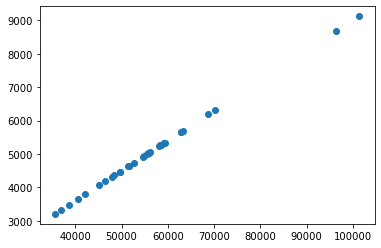

In [242]:
plt.scatter(df_hr['Annual Salary'], df_hr['Pension'])